# 🗂️ Data Loading

In [3]:
# Importing python libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt # visualizing data
%matplotlib inline
import seaborn as sns

# 🔍 Initial Data Inspection

In [5]:
# Importing csv file
df = pd.read_csv('Diwali Sales Data.csv', encoding= 'unicode_escape')

In [3]:
df.shape

(11251, 15)

In [4]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


# 🧹 Data Cleaning

In [6]:
# Dropping unwanted/blank columns
df.drop(['Status', 'unnamed1'], axis=1, inplace=True)

In [7]:
# Checking for null values
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [8]:
# Dropping null values
df.dropna(inplace=True)

In [9]:
# Changing data type
df['Amount'] = df['Amount'].astype('int')

In [10]:
df['Amount'].dtypes

dtype('int32')

# 📊 Exploratory Data Analysis

In [12]:
# Descriptive Statistics
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [13]:
df[['Age', 'Orders', 'Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


### Gender

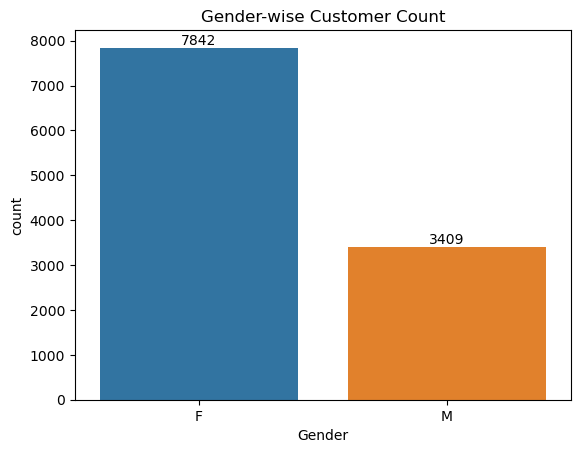

In [7]:
# Gender-wise Customer Count
ax = sns.countplot(x='Gender', data=df)
ax.set_title("Gender-wise Customer Count")  # Set chart title

for bars in ax.containers:
    ax.bar_label(bars)

Text(0.5, 1.0, 'Total Sales by Gender')

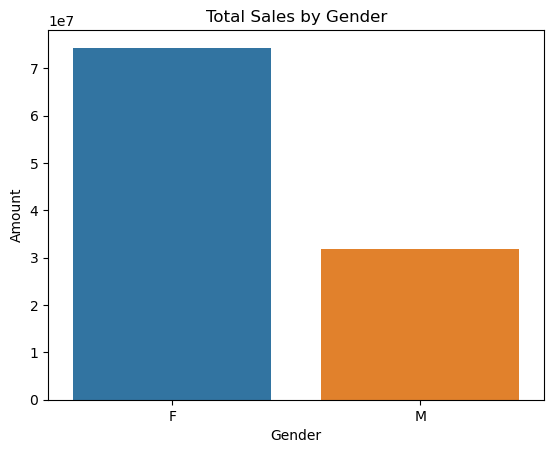

In [9]:
# Total Sales by Gender
sales_gen = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

ax = sns.barplot(x='Gender', y='Amount', data=sales_gen)
ax.set_title("Total Sales by Gender")

*From above graphs we can see that most of the buyers are females and even the purchasing power of females are greater than men.*

### Age

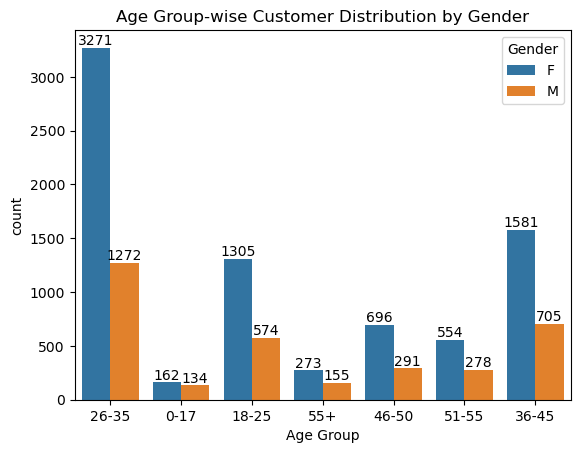

In [11]:
# Age Group-wise Customer Distribution by Gender
ax = sns.countplot(data=df, x='Age Group', hue='Gender')
ax.set_title("Age Group-wise Customer Distribution by Gender")

for bars in ax.containers:
    ax.bar_label(bars)

Text(0.5, 1.0, 'Total Sales by Age Group')

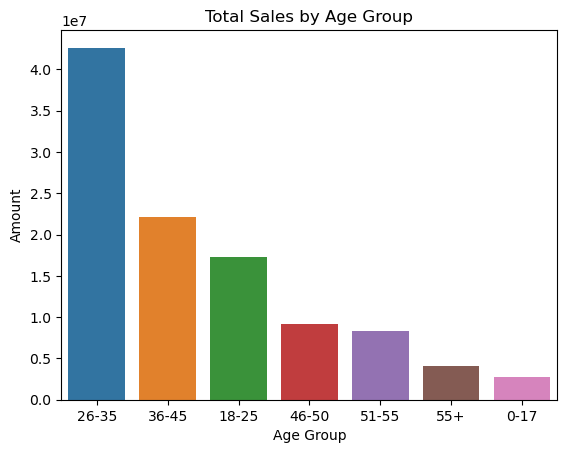

In [13]:
# Total Sales by Age Group
sales_age = df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

ax = sns.barplot(x='Age Group', y='Amount', data=sales_age)
ax.set_title("Total Sales by Age Group")

*From above graphs we can see that most of the buyers are of age group between 26-35 yrs female.*

### State

Text(0.5, 1.0, 'Top 10 States by Number of Orders')

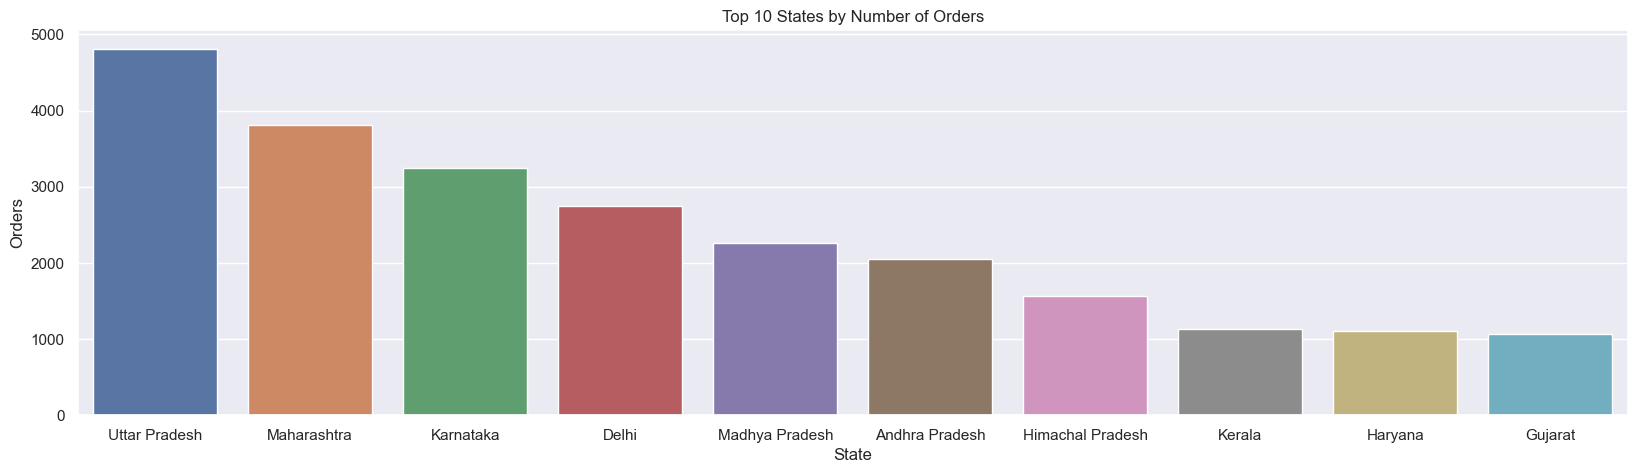

In [17]:
# Top 10 States by Number of Orders
sales_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize': (20, 5)})
ax = sns.barplot(data=sales_state, x='State', y='Orders')
ax.set_title("Top 10 States by Number of Orders")

Text(0.5, 1.0, 'Top 5 States by Total Sales Amount')

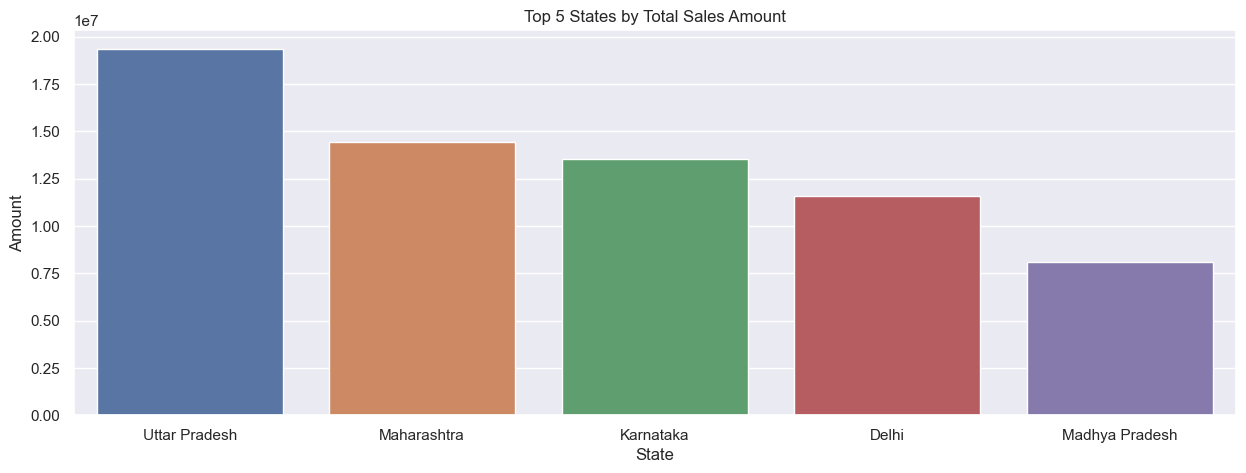

In [19]:
# Top 5 States by Total Sales Amount
sales_state = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(5)

sns.set(rc={'figure.figsize': (15, 5)})
ax = sns.barplot(data=sales_state, x='State', y='Amount')
ax.set_title("Top 5 States by Total Sales Amount")

*From above graphs we can see that most of the orders & total sales/amount are from Uttar Pradesh, Maharashtra and Karnataka respectively.*


### Marital Status

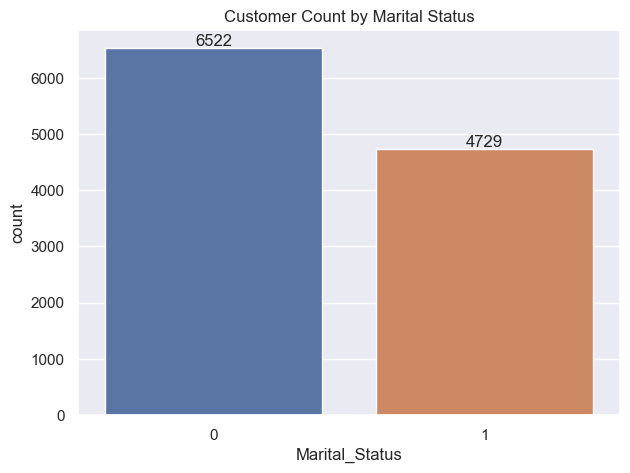

In [23]:
# Customer Count by Marital Status
sns.set(rc={'figure.figsize': (7, 5)})
ax = sns.countplot(data=df, x='Marital_Status')
ax.set_title("Customer Count by Marital Status")

for bars in ax.containers:
    ax.bar_label(bars)

Text(0.5, 1.0, 'Total Sales by Marital Status and Gender')

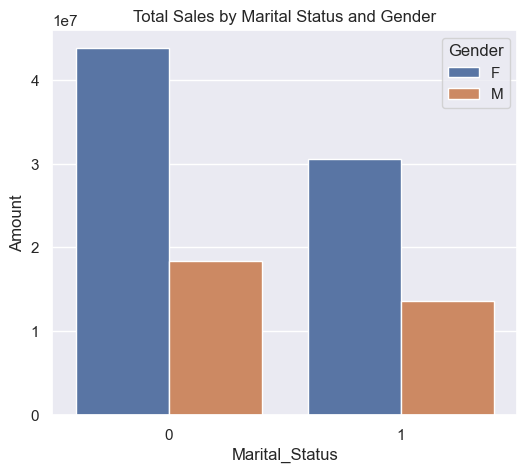

In [25]:
# Total Sales by Marital Status and Gender
sales_state = df.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize': (6, 5)})
ax = sns.barplot(data=sales_state, x='Marital_Status', y='Amount', hue='Gender')
ax.set_title("Total Sales by Marital Status and Gender")

*From above graphs we can see that most of the buyers are unmarried (women) and they have high purchasing power.*

### Occupation

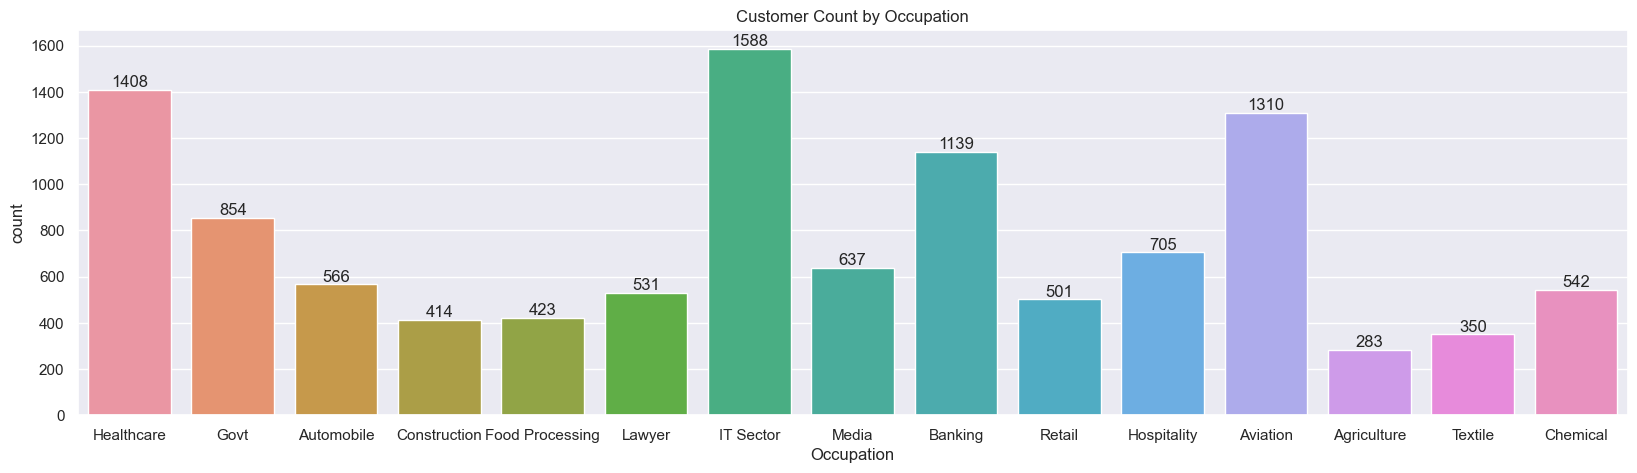

In [29]:
# Customer Count by Occupation
sns.set(rc={'figure.figsize': (20, 5)})
ax = sns.countplot(data=df, x='Occupation')
ax.set_title("Customer Count by Occupation")

for bars in ax.containers:
    ax.bar_label(bars)

Text(0.5, 1.0, 'Top 5 Occupations by Total Sales Amount')

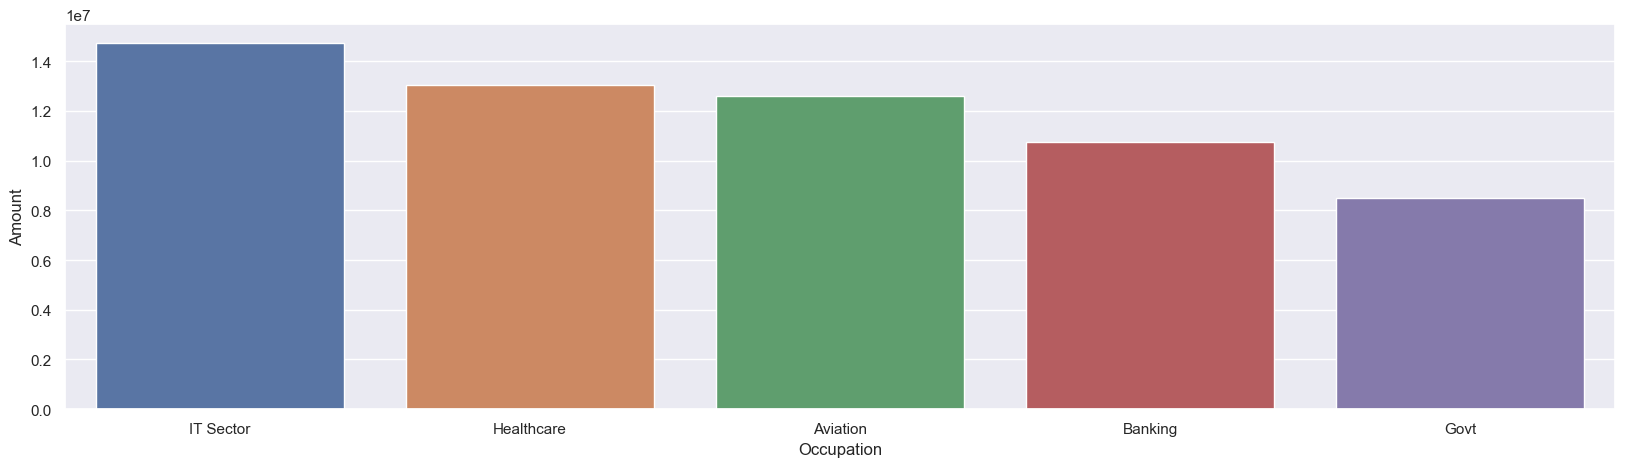

In [39]:
# Top 5 Occupations by Total Sales Amount
sales_state = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(5)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Occupation',y= 'Amount')
ax.set_title("Top 5 Occupations by Total Sales Amount")

*From above graphs we can see that most of the buyers are working in IT, Healthcare and Aviation sector.*

### Product Category

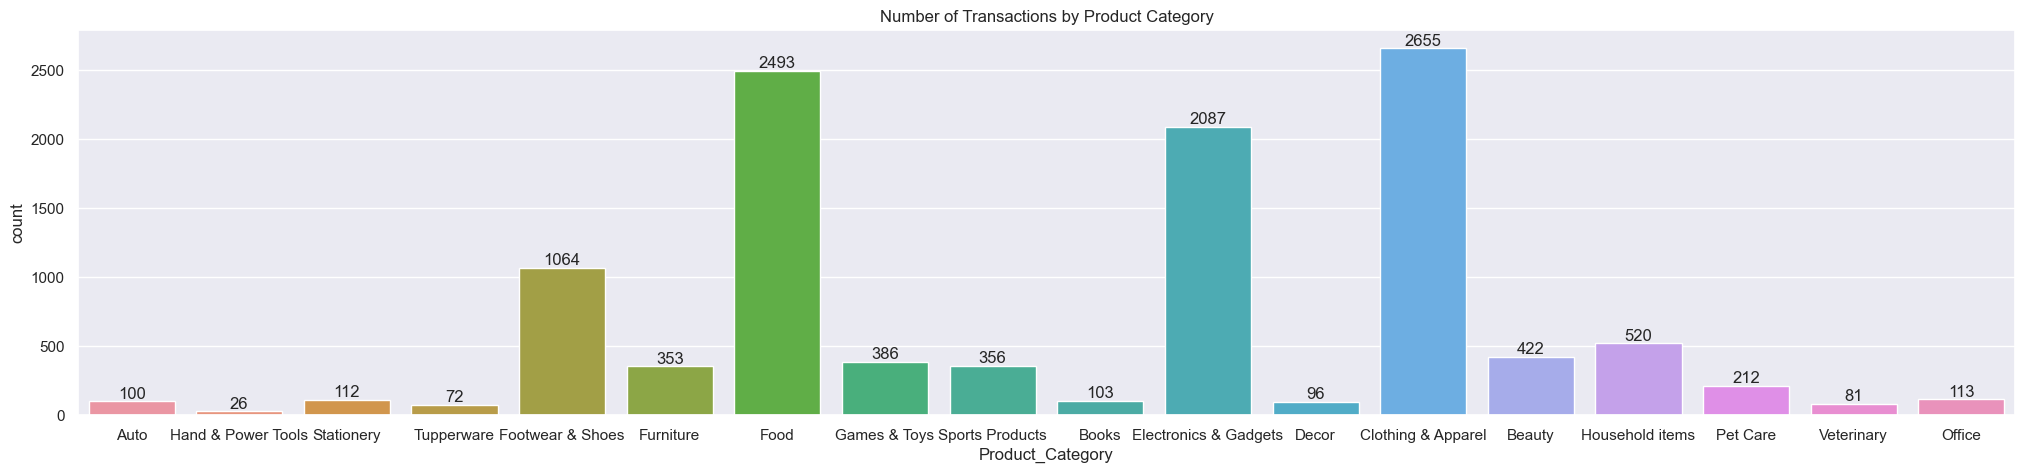

In [43]:
# Number of Transactions by Product Category
sns.set(rc={'figure.figsize':(25,5)})
ax = sns.countplot(data = df, x = 'Product_Category')
ax.set_title("Number of Transactions by Product Category")

for bars in ax.containers:
    ax.bar_label(bars)

Text(0.5, 1.0, 'Top 5 Product Categories by Total Sales Amount')

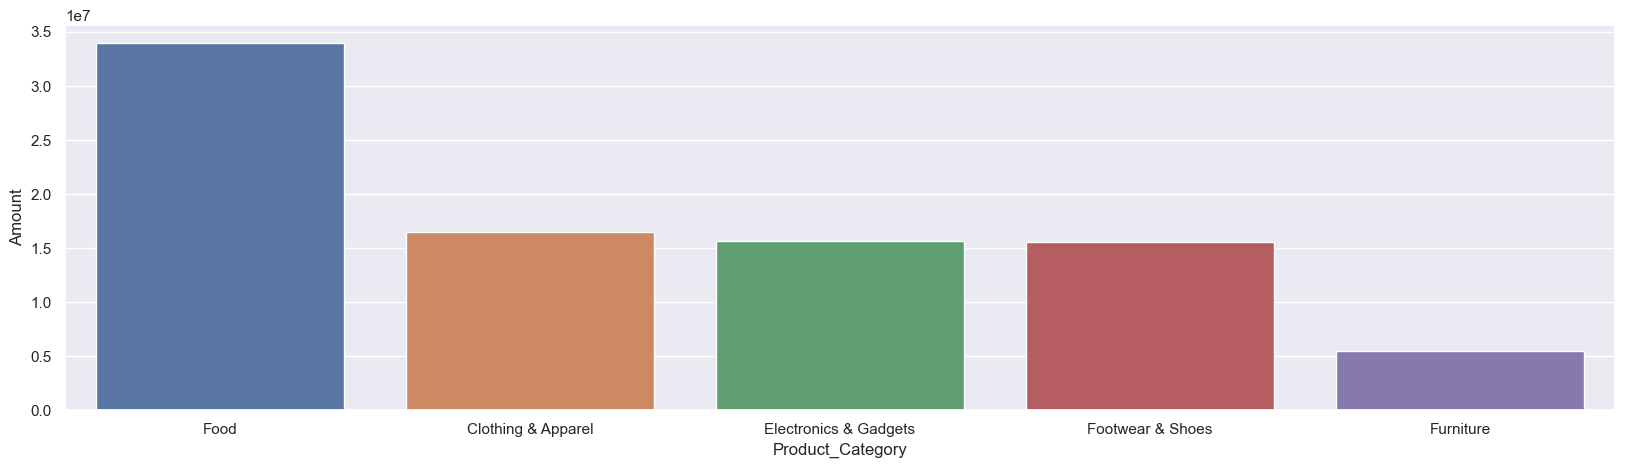

In [45]:
# Top 5 Product Categories by Total Sales Amount
sales_state = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(5)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Product_Category',y= 'Amount')
ax.set_title("Top 5 Product Categories by Total Sales Amount")

*From above graphs we can see that most of the sold products are from Food, Clothing and Electronics category.*

Text(0.5, 1.0, 'Top 10 Products by Total Number of Orders')

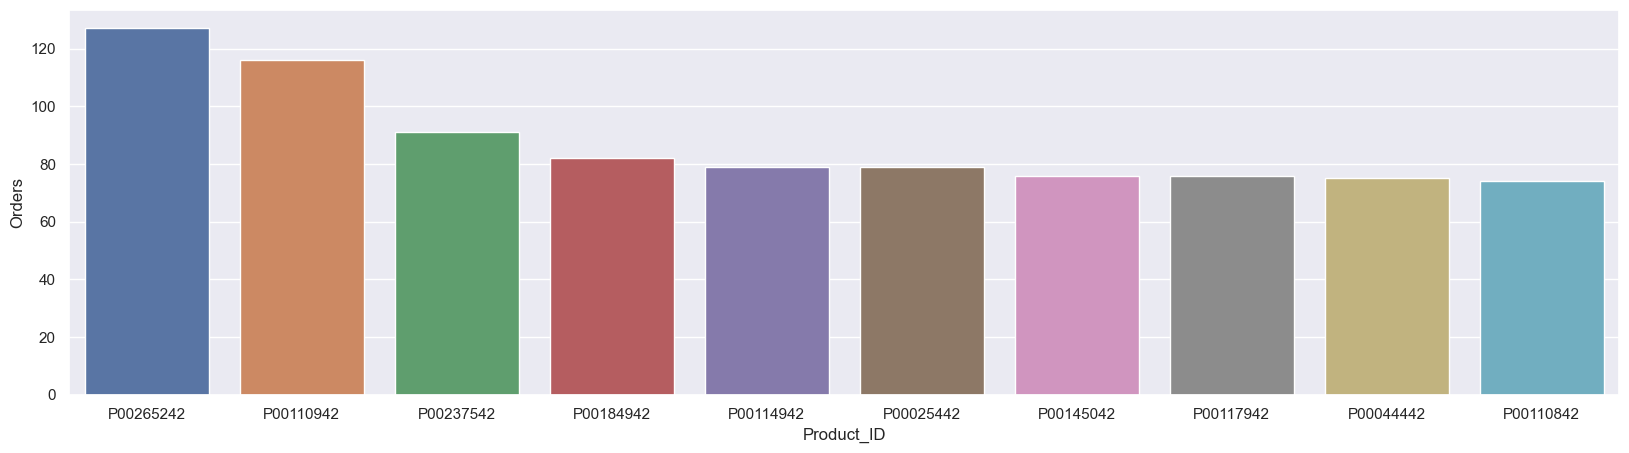

In [47]:
# 
sales_state = df.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Product_ID',y= 'Orders')
ax.set_title("Top 10 Products by Total Number of Orders")

## Conclusion:

### 

# 📈 Data Visualization

*Unmarried women age group 26-35 yrs from UP, Maharastra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category.*

# ✅ Conclusion

In this Diwali Sales Analysis project, we successfully explored customer purchasing behavior using transaction data.
Key highlights include:

- 🛍️ **Top Performing States**: States like Uttar Pradesh and Maharashtra contributed the most to overall sales.
- 👨‍👩‍👧‍👦 **Customer Demographics**: Unmarried females aged 26–35 were the most frequent buyers, indicating a young working-class customer base.
- 🎁 **Popular Products**: Household items and clothing were among the highest-selling product categories.

These insights can help businesses optimize product placement, target the right audience, and improve sales strategies during festive seasons like Diwali.